<a href="https://colab.research.google.com/github/Agusismande/Pasantia_LT/blob/main/LanasTrinidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime
from numpy.random import seed
from time import time

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dat = '/content/drive/MyDrive/Pasantia/datos1CO.csv'
CO1 = pd.read_csv(dat)
CO1 = pd.read_csv(dat, sep=';')

CO1

,Fecha,CO (ppb)
0,18/8/2023 16:31,304.0
1,18/8/2023 16:32,314.0
2,18/8/2023 16:33,327.0
3,18/8/2023 16:34,334.0
4,18/8/2023 16:35,310.0
...,...,...
150540,1/12/2023 18:11,NaN
150541,1/12/2023 18:12,NaN
150542,1/12/2023 18:13,NaN
150543,1/12/2023 18:14,NaN


In [ ]:
dat2 = '/content/drive/MyDrive/Pasantia/datos2CO.csv'
CO2 = pd.read_csv(dat2)
CO2 = pd.read_csv(dat2, sep=';')

CO2

,Fecha,CO (ppb)
0,1/12/2023 19:00,249.0
1,1/12/2023 19:01,NaN
2,1/12/2023 19:02,NaN
3,1/12/2023 19:03,NaN
4,1/12/2023 19:04,NaN
...,...,...
170216,28/3/2024 23:56,NaN
170217,28/3/2024 23:57,NaN
170218,28/3/2024 23:58,NaN
170219,28/3/2024 23:59,NaN


In [ ]:
# Convertir la columna 'Fecha' a tipo DateTime si aún no lo está

CO1['Fecha'] = pd.to_datetime(CO1['Fecha'], format='%d/%m/%Y %H:%M')

# Establecer la columna 'Fecha' como índice del DataFrame
CO1.set_index('Fecha', inplace=True)

# Remuestrear los datos por horas y calcular el promedio de los valores dentro de cada hora
resampleadoCO1 = CO1.resample('H').mean()

# Mostrar el DataFrame remuestreado
print(resampleadoCO1)

                        CO (ppb)
Fecha                           
2023-08-18 16:00:00   301.793103
2023-08-18 17:00:00   371.050000
2023-08-18 18:00:00   807.383333
2023-08-18 19:00:00  1070.550000
2023-08-18 20:00:00   818.950000
...                          ...
2023-12-01 14:00:00          NaN
2023-12-01 15:00:00          NaN
2023-12-01 16:00:00          NaN
2023-12-01 17:00:00          NaN
2023-12-01 18:00:00          NaN

[2523 rows x 1 columns]


In [ ]:
# Convertir la columna 'Fecha' a tipo DateTime
CO2['Fecha'] = pd.to_datetime(CO2['Fecha'], format='%d/%m/%Y %H:%M')

# Establecer la columna 'Fecha' como índice del DataFrame
CO2.set_index('Fecha', inplace=True)

# Remuestrear los datos por horas y calcular el promedio de los valores dentro de cada hora
resampleadoCO2 = CO2.resample('H').mean()

# rango de fechas del índice
resampleadoCO2 = resampleadoCO2.reindex(pd.date_range(start='2023-12-01', end='2024-03-29', freq='H'))

# Mostrar el DataFrame remuestreado
print(resampleadoCO2)

                       CO (ppb)
2023-12-01 00:00:00         NaN
2023-12-01 01:00:00         NaN
2023-12-01 02:00:00         NaN
2023-12-01 03:00:00         NaN
2023-12-01 04:00:00         NaN
...                         ...
2024-03-28 20:00:00  352.750000
2024-03-28 21:00:00  301.333333
2024-03-28 22:00:00  265.666667
2024-03-28 23:00:00  181.750000
2024-03-29 00:00:00  171.000000

[2857 rows x 1 columns]


In [ ]:
# Unir ambos DataFrames por filas (concatenación vertical)
datos_combinados = pd.concat([resampleadoCO1, resampleadoCO2])

# Mostrar el DataFrame resultante con los datos combinados
print(datos_combinados)

                        CO (ppb)
2023-08-18 16:00:00   301.793103
2023-08-18 17:00:00   371.050000
2023-08-18 18:00:00   807.383333
2023-08-18 19:00:00  1070.550000
2023-08-18 20:00:00   818.950000
...                          ...
2024-03-28 20:00:00   352.750000
2024-03-28 21:00:00   301.333333
2024-03-28 22:00:00   265.666667
2024-03-28 23:00:00   181.750000
2024-03-29 00:00:00   171.000000

[5380 rows x 1 columns]


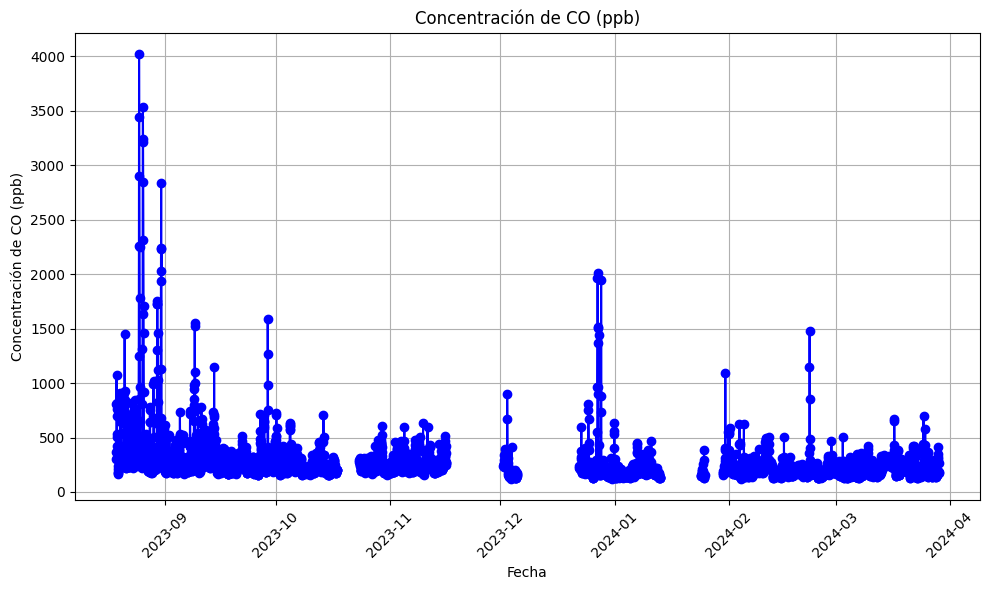

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(datos_combinados.index, datos_combinados['CO (ppb)'], color='blue', marker='o', linestyle='-')
plt.title('Concentración de CO (ppb)')
plt.xlabel('Fecha')
plt.ylabel('Concentración de CO (ppb)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Plot de los datos crudos

Se hacen los calculos para la conversion de ppb a ug/m3

In [ ]:
# Factor de conversión para cada fila
datos_combinados['CO (ug/m^3)'] = (datos_combinados['CO (ppb)'] * 28.01) / 24.45

# Mostrar el DataFrame con los datos convertidos
print(datos_combinados)

                        CO (ppb)  CO (ug/m^3)
2023-08-18 16:00:00   301.793103   345.735167
2023-08-18 17:00:00   371.050000   425.076094
2023-08-18 18:00:00   807.383333   924.940988
2023-08-18 19:00:00  1070.550000  1226.425583
2023-08-18 20:00:00   818.950000   938.191800
...                          ...          ...
2024-03-28 20:00:00   352.750000   404.111554
2024-03-28 21:00:00   301.333333   345.208453
2024-03-28 22:00:00   265.666667   304.348603
2024-03-28 23:00:00   181.750000   208.213395
2024-03-29 00:00:00   171.000000   195.898160

[5380 rows x 2 columns]


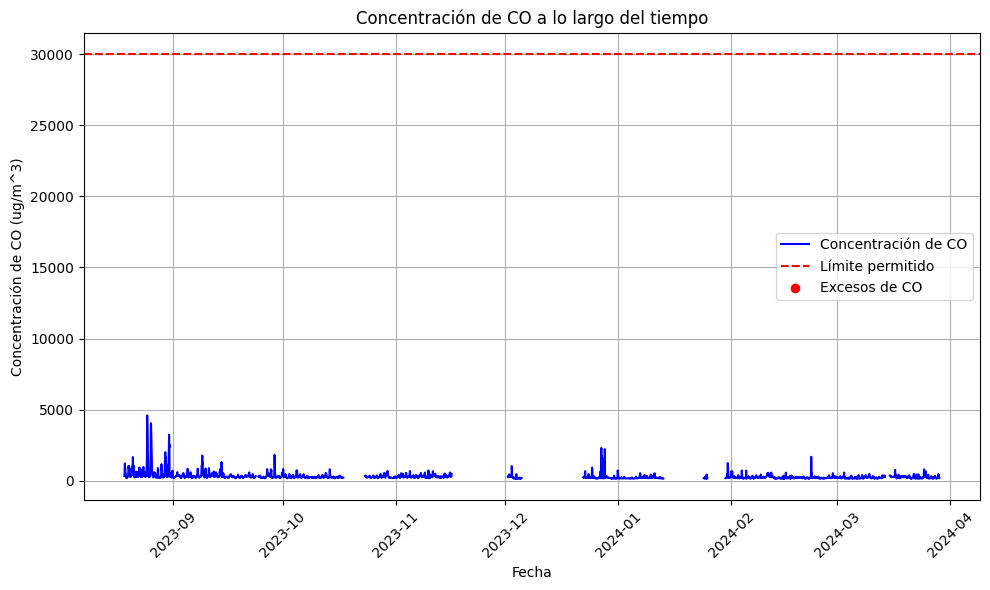

In [ ]:
import matplotlib.pyplot as plt

# Definir el límite permitido
limite_permitido = 30000

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la concentración de CO
plt.plot(datos_combinados.index, datos_combinados['CO (ug/m^3)'], color='blue', label='Concentración de CO')

# Graficar una línea horizontal para el límite permitido
plt.axhline(y=limite_permitido, color='red', linestyle='--', label='Límite permitido')

# Resaltar los puntos donde la concentración excede el límite permitido
excesos = datos_combinados[datos_combinados['CO (ug/m^3)'] > limite_permitido]
plt.scatter(excesos.index, excesos['CO (ug/m^3)'], color='red', label='Excesos de CO')

# Etiquetas y título
plt.title('Concentración de CO a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Concentración de CO (ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
# Calcular el promedio móvil octohorario
datos_combinados['Promedio móvil octohorario'] = datos_combinados['CO (ug/m^3)'].rolling(window=8).mean()

# Mostrar el DataFrame con la nueva columna
print(datos_combinados)


                        CO (ppb)  CO (ug/m^3)  Promedio móvil octohorario
2023-08-18 16:00:00   301.793103   345.735167                         NaN
2023-08-18 17:00:00   371.050000   425.076094                         NaN
2023-08-18 18:00:00   807.383333   924.940988                         NaN
2023-08-18 19:00:00  1070.550000  1226.425583                         NaN
2023-08-18 20:00:00   818.950000   938.191800                         NaN
...                          ...          ...                         ...
2024-03-28 20:00:00   352.750000   404.111554                  283.322009
2024-03-28 21:00:00   301.333333   345.208453                  299.980990
2024-03-28 22:00:00   265.666667   304.348603                  313.179294
2024-03-28 23:00:00   181.750000   208.213395                  315.040900
2024-03-29 00:00:00   171.000000   195.898160                  315.040900

[5380 rows x 3 columns]


In [ ]:
# Obtener los valores máximos de cada día a partir del promedio móvil octohorario
datos_combinados['Máximo diario'] = datos_combinados['Promedio móvil octohorario'].resample('D').max()

# Mostrar el DataFrame con la nueva columna
print(datos_combinados)


                        CO (ppb)  CO (ug/m^3)  Promedio móvil octohorario  \
2023-08-18 16:00:00   301.793103   345.735167                         NaN   
2023-08-18 17:00:00   371.050000   425.076094                         NaN   
2023-08-18 18:00:00   807.383333   924.940988                         NaN   
2023-08-18 19:00:00  1070.550000  1226.425583                         NaN   
2023-08-18 20:00:00   818.950000   938.191800                         NaN   
...                          ...          ...                         ...   
2024-03-28 20:00:00   352.750000   404.111554                  283.322009   
2024-03-28 21:00:00   301.333333   345.208453                  299.980990   
2024-03-28 22:00:00   265.666667   304.348603                  313.179294   
2024-03-28 23:00:00   181.750000   208.213395                  315.040900   
2024-03-29 00:00:00   171.000000   195.898160                  315.040900   

                     Máximo diario  
2023-08-18 16:00:00            NaN  
2

In [ ]:
# Imprimir el DataFrame completo mostrando todas las columnas
print(datos_combinados)

# Acceder directamente a la columna 'Máximo diario'
print(datos_combinados['Máximo diario'])

# Acceder a las primeras 5 filas de la columna 'Máximo diario'
print(datos_combinados['Máximo diario'].head())


                        CO (ppb)  CO (ug/m^3)  Promedio móvil octohorario  \
2023-08-18 16:00:00   301.793103   345.735167                         NaN   
2023-08-18 17:00:00   371.050000   425.076094                         NaN   
2023-08-18 18:00:00   807.383333   924.940988                         NaN   
2023-08-18 19:00:00  1070.550000  1226.425583                         NaN   
2023-08-18 20:00:00   818.950000   938.191800                         NaN   
...                          ...          ...                         ...   
2024-03-28 20:00:00   352.750000   404.111554                  283.322009   
2024-03-28 21:00:00   301.333333   345.208453                  299.980990   
2024-03-28 22:00:00   265.666667   304.348603                  313.179294   
2024-03-28 23:00:00   181.750000   208.213395                  315.040900   
2024-03-29 00:00:00   171.000000   195.898160                  315.040900   

                     Máximo diario  
2023-08-18 16:00:00            NaN  
2

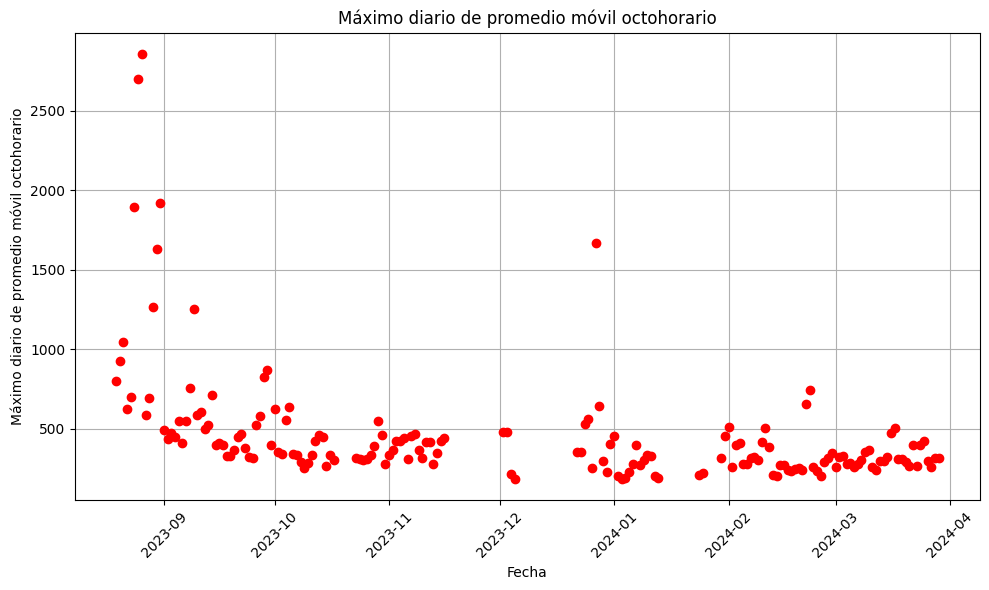

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(datos_combinados['Máximo diario'], color='red', marker='o', linestyle='-')
plt.title('Máximo diario de promedio móvil octohorario')
plt.xlabel('Fecha')
plt.ylabel('Máximo diario de promedio móvil octohorario')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


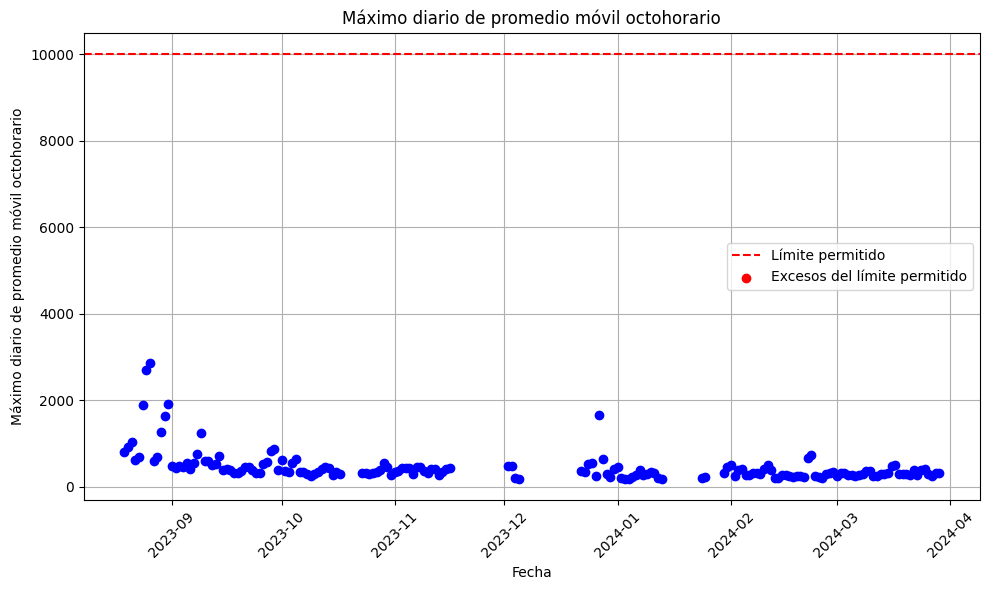

In [ ]:
import matplotlib.pyplot as plt

# Definir el límite permitido
limite_permitido = 10000

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar el máximo diario de promedio móvil octohorario
plt.plot(datos_combinados['Máximo diario'], color='blue', marker='o', linestyle='-')

# Graficar una línea horizontal para el límite permitido
plt.axhline(y=limite_permitido, color='red', linestyle='--', label='Límite permitido')

# Resaltar los puntos donde los datos exceden el límite permitido
excesos = datos_combinados[datos_combinados['Máximo diario'] > limite_permitido]
plt.scatter(excesos.index, excesos['Máximo diario'], color='red', label='Excesos del límite permitido')

# Etiquetas y título
plt.title('Máximo diario de promedio móvil octohorario')
plt.xlabel('Fecha')
plt.ylabel('Máximo diario de promedio móvil octohorario')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


TRATAMIENTO DE LOS DATOS DE **NO2**

In [ ]:
path = '/content/drive/MyDrive/Pasantia/DatosNO2.csv'
NO2 = pd.read_csv(path)
NO2 = pd.read_csv(path, sep=';')

NO2

,Fecha,NO2
0,1/8/2023 0:01,0.0
1,1/8/2023 0:02,0.0
2,1/8/2023 0:03,0.0
3,1/8/2023 0:04,0.0
4,1/8/2023 0:05,0.0
...,...,...
384475,30/3/2024 23:56,NaN
384476,30/3/2024 23:57,NaN
384477,30/3/2024 23:58,NaN
384478,30/3/2024 23:59,NaN


In [ ]:
# Convertir la columna 'Fecha' a tipo DateTime
NO2['Fecha'] = pd.to_datetime(NO2['Fecha'], format='%d/%m/%Y %H:%M')
# Establecer la columna 'Fecha' como índice del DataFrame
NO2.set_index('Fecha', inplace=True)

# Remuestrear los datos por horas y calcular el promedio de los valores dentro de cada hora
datos_resampleadoNO2 = NO2.resample('H').mean()

# Mostrar el DataFrame remuestreado
print(datos_resampleadoNO2)

                      NO2
Fecha                    
2023-08-01 00:00:00  0.00
2023-08-01 01:00:00  0.00
2023-08-01 02:00:00  0.00
2023-08-01 03:00:00  0.00
2023-08-01 04:00:00  0.00
...                   ...
2024-03-30 20:00:00  1.25
2024-03-30 21:00:00  1.25
2024-03-30 22:00:00  1.00
2024-03-30 23:00:00  1.00
2024-03-31 00:00:00  1.00

[5833 rows x 1 columns]


GRAFICA DATOS CRUDOS

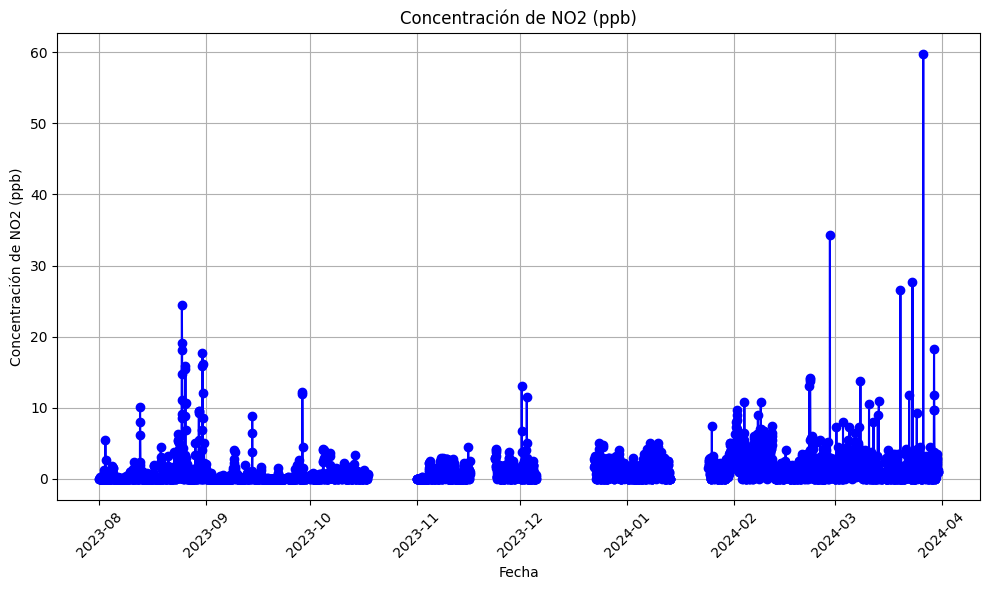

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Generar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(datos_resampleadoNO2.index, datos_resampleadoNO2['NO2'], color='blue', marker='o', linestyle='-')
plt.title('Concentración de NO2 (ppb)')
plt.xlabel('Fecha')
plt.ylabel('Concentración de NO2 (ppb)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Factor de conversión para cada fila
datos_resampleadoNO2['NO2 (ug/m^3)'] = (datos_resampleadoNO2['NO2'] * 46.0055) / 24.45

# Mostrar el DataFrame con los datos convertidos
print(datos_resampleadoNO2)

                      NO2  NO2 (ug/m^3)
Fecha                                  
2023-08-01 00:00:00  0.00      0.000000
2023-08-01 01:00:00  0.00      0.000000
2023-08-01 02:00:00  0.00      0.000000
2023-08-01 03:00:00  0.00      0.000000
2023-08-01 04:00:00  0.00      0.000000
...                   ...           ...
2024-03-30 20:00:00  1.25      2.352019
2024-03-30 21:00:00  1.25      2.352019
2024-03-30 22:00:00  1.00      1.881616
2024-03-30 23:00:00  1.00      1.881616
2024-03-31 00:00:00  1.00      1.881616

[5833 rows x 2 columns]


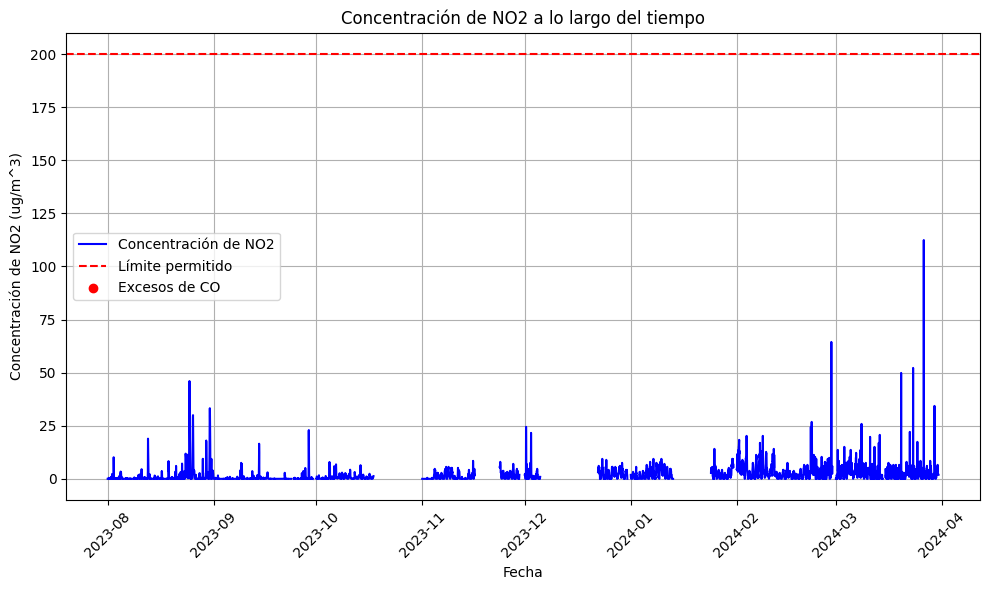

In [ ]:
import matplotlib.pyplot as plt

# Definir el límite permitido
limite_permitido = 200

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la concentración de NO2
plt.plot(datos_resampleadoNO2.index, datos_resampleadoNO2['NO2 (ug/m^3)'], color='blue', label='Concentración de NO2')

# Graficar una línea horizontal para el límite permitido
plt.axhline(y=limite_permitido, color='red', linestyle='--', label='Límite permitido')

# Resaltar los puntos donde la concentración excede el límite permitido
excesos = datos_resampleadoNO2[datos_resampleadoNO2['NO2 (ug/m^3)'] > limite_permitido]
plt.scatter(excesos.index, excesos['NO2 (ug/m^3)'], color='red', label='Excesos de CO')

# Etiquetas y título
plt.title('Concentración de NO2 a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Concentración de NO2 (ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
dat = '/content/drive/MyDrive/Pasantia/PM1.csv'
PM1 = pd.read_csv(dat)
PM1 = pd.read_csv(dat, sep=';')

PM1

<ipython-input-21-f4390c6c929f>:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  PM1 = pd.read_csv(dat, sep=';')


,Fecha,PM10,PM25,Unnamed: 3,Unnamed: 4
0,1/8/2023 0:01,12.65,6.21,NaN,NaN
1,1/8/2023 0:02,8.03,7.54,NaN,NaN
2,1/8/2023 0:03,5.61,5.38,NaN,NaN
3,1/8/2023 0:04,7.74,6.49,NaN,NaN
4,1/8/2023 0:05,5.61,5.38,NaN,NaN
...,...,...,...,...,...
262837,NaN,NaN,1.10,NaN,NaN
262838,NaN,NaN,1.33,NaN,NaN
262839,NaN,NaN,1.94,NaN,NaN
262840,NaN,NaN,2.39,NaN,NaN


In [ ]:
# Convertir la columna 'Fecha' a tipo DateTime

PM1['Fecha'] = pd.to_datetime(PM1['Fecha'], format='%d/%m/%Y %H:%M')

# Establecer la columna 'Fecha' como índice del DataFrame
PM1.set_index('Fecha', inplace=True)

# Remuestrear los datos por horas y calcular el promedio de los valores dentro de cada hora
resampleadoPM1 = PM1.resample('H').mean()

# rango de fechas del índice
resampleadoPM1 = resampleadoPM1.reindex(pd.date_range(start='2023-08-01', end='2024-01-10', freq='H'))

# Mostrar el DataFrame remuestreado
print(resampleadoPM1)

                         PM10      PM25  Unnamed: 3  Unnamed: 4
2023-08-01 00:00:00  5.736610  5.150508         NaN         NaN
2023-08-01 01:00:00  4.293833  4.232333         NaN         NaN
2023-08-01 02:00:00  4.853167  4.619833         NaN         NaN
2023-08-01 03:00:00  4.460167  4.338500         NaN         NaN
2023-08-01 04:00:00  4.542167  4.087500         NaN         NaN
...                       ...       ...         ...         ...
2024-01-09 20:00:00  3.728167  1.129000         NaN         NaN
2024-01-09 21:00:00  5.273500  2.708500         NaN         NaN
2024-01-09 22:00:00  6.248667  3.653833         NaN         NaN
2024-01-09 23:00:00  5.860333  3.653000         NaN         NaN
2024-01-10 00:00:00  7.640000  4.780000         NaN         NaN

[3889 rows x 4 columns]


In [ ]:
dato = '/content/drive/MyDrive/Pasantia/PM2.csv'
PM2 = pd.read_csv(dato)
PM2 = pd.read_csv(dato, sep=';')

PM2

,Fecha,PM10,PM25
0,10/1/2024 0:00,2.64,3.22
1,10/1/2024 0:01,4.21,2.61
2,10/1/2024 0:02,5.57,3.73
3,10/1/2024 0:03,5.29,2.56
4,10/1/2024 0:04,4.31,3.22
...,...,...,...
132475,10/4/2024 23:55,8.13,4.59
132476,10/4/2024 23:56,6.01,4.95
132477,10/4/2024 23:57,6.39,3.53
132478,10/4/2024 23:58,4.06,3.67


In [ ]:
# Convertir la columna 'Fecha' a tipo DateTime

PM2['Fecha'] = pd.to_datetime(PM2['Fecha'], format='%d/%m/%Y %H:%M')

# Establecer la columna 'Fecha' como índice del DataFrame
PM2.set_index('Fecha', inplace=True)

# Remuestrear los datos por horas y calcular el promedio de los valores dentro de cada hora
resampleadoPM2 = PM2.resample('H').mean()

# Mostrar el DataFrame remuestreado
print(resampleadoPM2)

                          PM10      PM25
Fecha                                   
2024-01-10 00:00:00   4.519000  3.084000
2024-01-10 01:00:00   3.962167  2.435667
2024-01-10 02:00:00   4.369500  2.614500
2024-01-10 03:00:00   4.538833  2.829333
2024-01-10 04:00:00   7.487000  4.683667
...                        ...       ...
2024-04-10 19:00:00  11.367333  6.562833
2024-04-10 20:00:00  10.763167  6.698833
2024-04-10 21:00:00   9.794167  6.240667
2024-04-10 22:00:00   9.106667  5.572000
2024-04-10 23:00:00   8.266667  5.382000

[2208 rows x 2 columns]


In [ ]:
# Unir ambos DataFrames por filas (concatenación vertical)
unidospm = pd.concat([resampleadoPM1, resampleadoPM2])

# Mostrar el DataFrame resultante con los datos combinados
print(unidospm)

                          PM10      PM25  Unnamed: 3  Unnamed: 4
2023-08-01 00:00:00   5.736610  5.150508         NaN         NaN
2023-08-01 01:00:00   4.293833  4.232333         NaN         NaN
2023-08-01 02:00:00   4.853167  4.619833         NaN         NaN
2023-08-01 03:00:00   4.460167  4.338500         NaN         NaN
2023-08-01 04:00:00   4.542167  4.087500         NaN         NaN
...                        ...       ...         ...         ...
2024-04-10 19:00:00  11.367333  6.562833         NaN         NaN
2024-04-10 20:00:00  10.763167  6.698833         NaN         NaN
2024-04-10 21:00:00   9.794167  6.240667         NaN         NaN
2024-04-10 22:00:00   9.106667  5.572000         NaN         NaN
2024-04-10 23:00:00   8.266667  5.382000         NaN         NaN

[6097 rows x 4 columns]


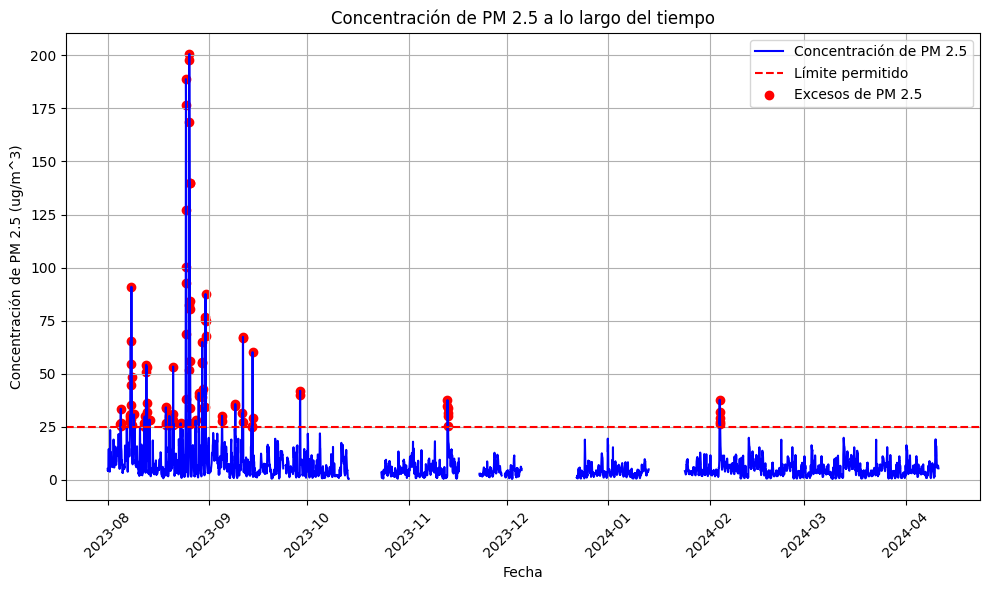

In [ ]:
import matplotlib.pyplot as plt

# Definir el límite permitido
limite_permitido = 25

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la concentración de PM
plt.plot(unidospm.index, unidospm['PM25'], color='blue', label='Concentración de PM 2.5')

# Graficar una línea horizontal para el límite permitido
plt.axhline(y=limite_permitido, color='red', linestyle='--', label='Límite permitido')

# Resaltar los puntos donde la concentración excede el límite permitido
excesos = unidospm[unidospm['PM25'] > limite_permitido]
plt.scatter(excesos.index, excesos['PM25'], color='red', label='Excesos de PM 2.5')

# Etiquetas y título
plt.title('Concentración de PM 2.5 a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Concentración de PM 2.5 (ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


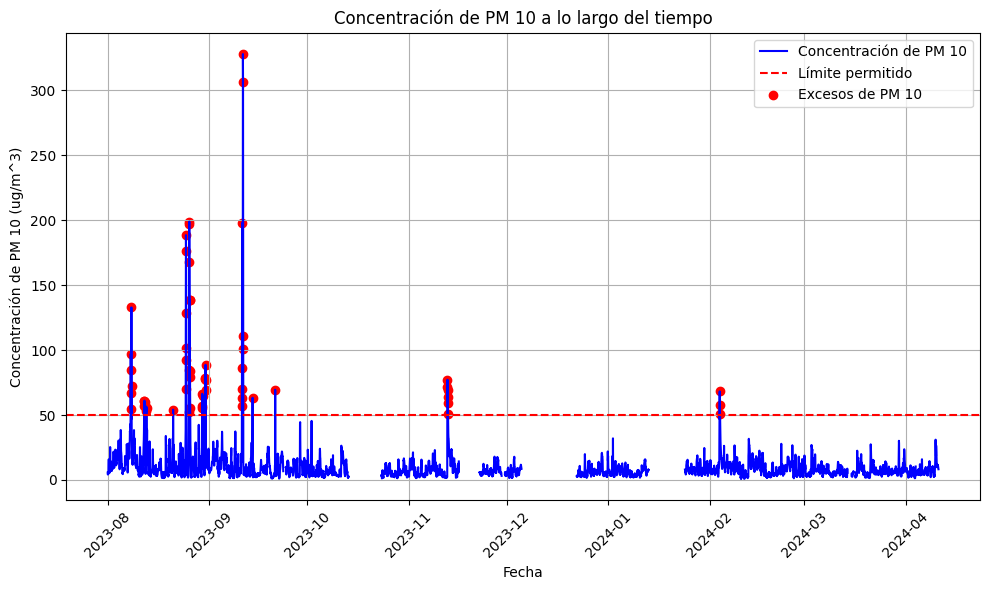

In [ ]:
import matplotlib.pyplot as plt

# Definir el límite permitido
limite_permitido = 50

# Crear una figura y ejes
plt.figure(figsize=(10, 6))

# Graficar la concentración de PM
plt.plot(unidospm.index, unidospm['PM10'], color='blue', label='Concentración de PM 10')

# Graficar una línea horizontal para el límite permitido
plt.axhline(y=limite_permitido, color='red', linestyle='--', label='Límite permitido')

# Resaltar los puntos donde la concentración excede el límite permitido
excesos = unidospm[unidospm['PM10'] > limite_permitido]
plt.scatter(excesos.index, excesos['PM10'], color='red', label='Excesos de PM 10')

# Etiquetas y título
plt.title('Concentración de PM 10 a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Concentración de PM 10 (ug/m^3)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
